<a href="https://colab.research.google.com/github/AnchitSharma/Data_Analysis_using_datasets/blob/master/Hypothesis_Testing_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Chi Square Test</h3>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

<h1> Coin Example


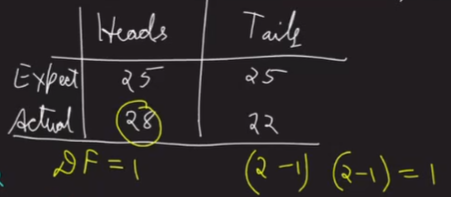

In [4]:
# H0: Coin is fair
# Ha: Coin is biased
# Test Statistic: Chi square
# Right tailed test.
(28 - 25) ** 2 / 25 + (22 - 25) ** 2 / 25

0.72

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/data/CardioGoodFitness.csv')

In [8]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [9]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Gender Vs Product

In [10]:
gender_product = pd.crosstab(index = df['Gender'], columns = df['Product'])
gender_product

Product,TM195,TM498,TM798
Gender,,,
Female,40,29,7
Male,40,31,33


By looking at the crosstab, we tend to believe that gender impacts product sales. 
<br>We need to find out if this difference is statistically significant. 

In [11]:
#H0: Gender does not affect product
#H1: Gender affects product

chi_stat, p_value, dof, expected = chi2_contingency(gender_product)
print("stat = %.3f, p-value = %.3f"%(chi_stat, p_value))
if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to reject H0")

stat = 12.924, p-value = 0.002
Reject H0


Income vs Product

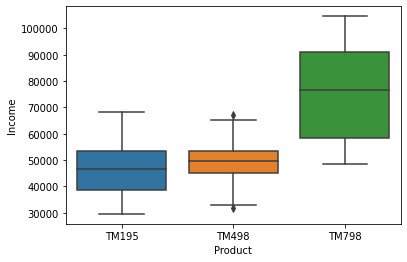

In [12]:
sns.boxplot(x = "Product", y = "Income", data=df)

Seems like only high salaried customers tend to buy P3.<br>
Is it a chance or statistically significant?

In [13]:
a = df[df['Product'] == 'TM195']['Income']
b = df[df['Product'] == 'TM498']['Income']
c = df[df['Product'] == 'TM798']['Income']

In [14]:
# H0: These three Income groups are similar
# Ha: They are different
f_stat, p_value = f_oneway(a, b, c)
print(f"f_stat = {f_stat}, p-value = {p_value}")

f_stat = 89.25903546601671, p-value = 1.5644991316342494e-27


Since p-value is low, it means that the Income groups are significantly different for each product as we observed through the boxplot.
<p>
Binning Income to use Chi2 Test

In [15]:
bins = [0, df['Income'].median(), df['Income'].max()]
labels = ['low', 'high']

In [16]:
df['Income_bin'] = pd.cut(df['Income'], bins, labels = labels)

In [17]:
income_bin_product = pd.crosstab(index = df['Income_bin'], columns = df['Product'])
income_bin_product

Product,TM195,TM498,TM798
Income_bin,,,
low,50,35,5
high,30,25,35


In [18]:
# H0: Income and Product are Independent
# H1: They are dependent

chi_stat, p_value, dof, expected = chi2_contingency(income_bin_product)
print(f"stat = {chi_stat}, p_value = {p_value}")

if p_value <0.05:
  print("Reject H0")
else:
  print("Failed to reject H0")

stat = 29.166666666666668, p_value = 4.640222499769401e-07
Reject H0


Hence, Chi2 Test also tells us that income and product are dependent.

Gender Vs Income

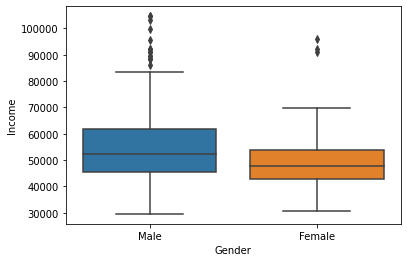

In [19]:
sns.boxplot(x = df['Gender'], y = df['Income'], data = df)

Let's use all three tests here:

In [20]:
male_income = df[df['Gender'] == 'Male']['Income']
female_income = df[df['Gender'] == 'Female']['Income']

In [22]:
#H0: Gender and Income are Independent (equal mean)
ttest_ind(male_income, female_income)
#p-value is small , so reject H0

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

In [23]:
f_oneway(male_income, female_income)

F_onewayResult(statistic=7.576193699788215, pvalue=0.0065272630972144025)

In [24]:
gender_income = pd.crosstab(index = df['Gender'], columns = df['Income_bin'])
gender_income

Income_bin,low,high
Gender,,
Female,46,30
Male,44,60


In [26]:
chi_stat, p_value,dof, expected = chi2_contingency(gender_income)
print(f"stats = {chi_stat}, p_value = {p_value}")

if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

stats = 5.123987854251012, p_value = 0.023597328751612016
Reject H0
